# Analysis of Black Friday Dataset

## Dataset Description
The dataset shows the purchases of a store on a black Friday. It contain 12 columns which are:  
* The user ID.
* The product ID.
* The gender of the costumer.
* The age of the costumer.
* The occupation of the costumer.
* The city category. 
* The duration at which the user has been in the city.
* Marital status of the costumer.
* The product category under three main categories.
* The purchase price.

## Dataset Issues
After taking a look on the data set, I came to find 2 issues with the it: 
1. It contain some missing values: It can be replaced with zeros.
2. Some columns are masked which means I can't have a full understanding of the data unless I know what each masked value means. For example, the product category columns are masked so it is hard to know what each vale means under this column. I assume it is a subcategory under the three main categories and based on this I'd perform my analysis.

## Importing Datasets


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('BlackFriday.csv')

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## EDA
To explore the data, let's start with identifying the data type of each feature.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


All the data are qualitative except for the **Purchase**. The product categories has some missing values. Before replacing the missing values with zero, I have to check for the existing values.

In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


Since the minimum value is 1 in all the Product Categories then I can replace the NaN values with zero which means the product does not belong to this category.

In [6]:
data = data.fillna(0)

### Age
First I'll analyze the age group. I'll perform both univariate and multivariate analysis. 

In [7]:
np.unique(data['Age'])

array(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
      dtype=object)

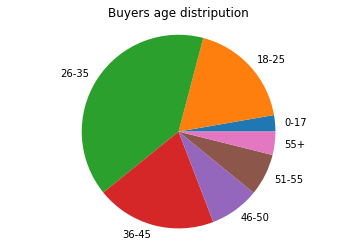

In [8]:
Slices = data.groupby('Age').count()
Slices = list(Slices['User_ID'])
Labels = '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'
plt.pie(Slices, labels = Labels)
plt.title("Buyers age distripution")
plt.axis('equal')
plt.show()

We conclude from the pie chart above that that most of the buyers were from the age groups 26-35 then 18-25. Both of them represent the more than half of the buyers. But that does not mean they spent the most compared to the other groups.

In [9]:
SumofPurchasePerAge = data.groupby('Age').mean()

Text(0.5, 0, 'Age Group')

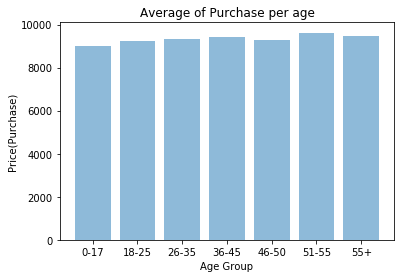

In [10]:
APA_bars = list(SumofPurchasePerAge['Purchase'])
labels = ('0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+')
index = np.arange(len(labels))
plt.title("Average of Purchase per age")
plt.bar(index, APA_bars, align='center', alpha=0.5)
plt.xticks(index, labels)
plt.ylabel('Price(Purchase)')
plt.xlabel('Age Group')

It seems from the bar chart above that the age group does not affect the purchase. The average of the purchases per age group are close. So, even though one age group bought more, that means they are the majority of the store costumers and they spend the same as the other costumers.

Lets see now if the age group affect the category which the costumers buy from.

### Gender
I'll analyze the gender. I'll perform both univariate and multivariate analysis.

In [11]:
Slices_G = data.groupby('Gender').count()
Slices_G

,User_ID,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,,,,,,,,,,,
F,132197,132197,132197,132197,132197,132197,132197,132197,132197,132197,132197
M,405380,405380,405380,405380,405380,405380,405380,405380,405380,405380,405380


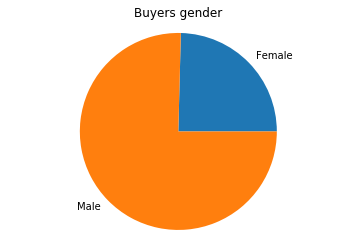

In [12]:
Slices_G = list(Slices_G['User_ID'])
Labels_G = 'Female', 'Male'
plt.pie(Slices_G, labels = Labels_G)
plt.title("Buyers gender")
plt.axis('equal')
plt.show()

From the pie chart we can see that the male costumers represent more than the female. Next I'll see who would spend more on average per purchase.

Text(0.5, 0, 'Gender')

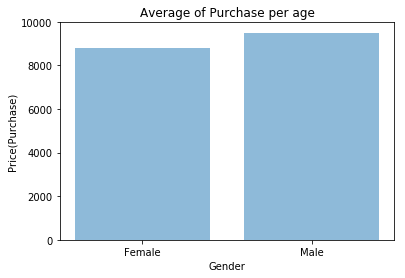

In [13]:
SumofPurchasePerGender = data.groupby('Gender').mean()
APG_bars = list(SumofPurchasePerGender['Purchase'])
labels = ('Female', 'Male')
index = np.arange(len(labels))
plt.title("Average of Purchase per age")
plt.bar(index, APG_bars, align='center', alpha=0.5)
plt.xticks(index, labels)
plt.ylabel('Price(Purchase)')
plt.xlabel('Gender')

It can be seen from the bar chart above that the there is no huge difference between the males and females in spending. 

### Occupation
I'll analyze the occupation to see if the occupation affects the buyers or the price of the purchase. I'll perform both univariate and multivariate analysis.

In [14]:
Slices_O = data.groupby('Occupation').count()
Slices_O

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,,,,,,,,,,,
0,68120,68120,68120,68120,68120,68120,68120,68120,68120,68120,68120
1,45971,45971,45971,45971,45971,45971,45971,45971,45971,45971,45971
2,25845,25845,25845,25845,25845,25845,25845,25845,25845,25845,25845
3,17366,17366,17366,17366,17366,17366,17366,17366,17366,17366,17366
4,70862,70862,70862,70862,70862,70862,70862,70862,70862,70862,70862
5,11985,11985,11985,11985,11985,11985,11985,11985,11985,11985,11985
6,19822,19822,19822,19822,19822,19822,19822,19822,19822,19822,19822
7,57806,57806,57806,57806,57806,57806,57806,57806,57806,57806,57806
8,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524


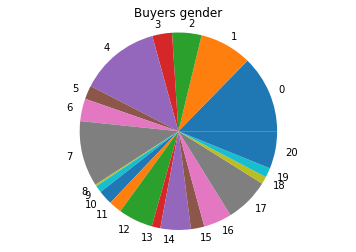

In [15]:
Slices_O = list(Slices_O['User_ID'])
Labels_O = '0',  '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'
plt.pie(Slices_O, labels = Labels_O)
plt.title("Buyers gender")
plt.axis('equal')
plt.show()

From the pie chart we can see that occupation 0,4 and 7 are the most frequent among the costumers. Let's see which occupation spends more.

Text(0.5, 0, 'Occupation')

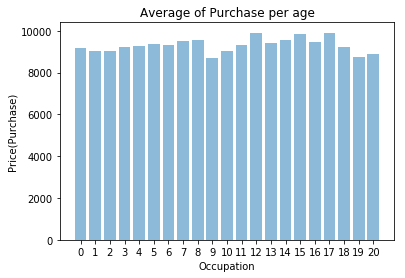

In [16]:
SumofPurchasePerOccup = data.groupby('Occupation').mean()
APO_bars = list(SumofPurchasePerOccup['Purchase'])
labels = ('0',  '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20')
index = np.arange(len(labels))
plt.title("Average of Purchase per age")
plt.bar(index, APO_bars, align='center', alpha=0.5)
plt.xticks(index, labels)
plt.ylabel('Price(Purchase)')
plt.xlabel('Occupation')

Same as the results with the age and gender, the occupation does not affect the purchase. But the lowest purchase average is for occupation 9 and the highest is for 12 and 17.

### Checking for Outliers
Since all the data are qualitative except for the Purchase column, it is the only column that I can perform this analysis on.

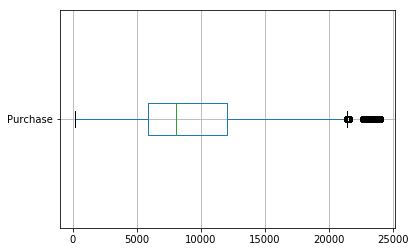

In [17]:
data.boxplot(['Purchase'], vert = False)

From the box plot above, there are no outliers. The extreme values above are not considered outliers as they may represent highly priced items such as TVs. It's is not only one value, it is more than one which eliminated the possibility of it being a typo.

## Q & A
### What can the stores do to increase the profits?
From the analysis above, the store can target the costumers within 19-35 since they are the majority. Also, they should target the female users to increase their purchases and make them buy from the store more.

### What factors affect the store's sales?
Based on the analysis the sales are affected by the age group and gender. It also may be affected by the city and product categories but I did not analyze them yet.

### What are the common features between the costumers who bought the same product?
I'm not sure what type of analysis is needed to answer this question. I'd suggest identifying the commonly bought products then using the count function to generate a table where the highest number of summation means that it is a common feature.